# Linear regression

Consider the case where we have a linear model for predicting housing prices. We are predicting the housing prices based on features in the 
housing dataset. If we denote the features as $\boldsymbol x_0, \dotsc, \boldsymbol x_n$ and collect them into a vector $\boldsymbol {x}$, and the price of the houses as $y$. Assuming that we have 
a prediction model in the way such that $\hat{y}_i =  f(\boldsymbol {x}_i) = \boldsymbol \theta^T\boldsymbol {x}_i$.


If we collect the dataset into a $(N,D)$ data matrix $\boldsymbol X$, we can write down our model like this:

$$
\begin{bmatrix} 
\boldsymbol{x}_1^T \\
\vdots \\ 
\boldsymbol{x}_N^T 
\end{bmatrix} \boldsymbol{\theta} = \begin{bmatrix} 
y_1 \\
\vdots \\ 
y_2 
\end{bmatrix},
$$

i.e.,

$$
\boldsymbol X\boldsymbol{\theta} = \boldsymbol{y}.
$$

Note that the data points are the *rows* of the data matrix, i.e., every column is a dimension of the data. 

Our goal is to find the best $\boldsymbol\theta$ such that we minimize the following objective (least square).

$$
\begin{eqnarray} 
& \sum^n_{i=1}{\lVert \bar{y_i} - y_i \rVert^2} \\
&= \sum^n_{i=1}{\lVert \boldsymbol \theta^T\boldsymbol{x}_i - y_i \rVert^2} \\
&= (\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y).
\end{eqnarray}
$$

If we set the gradient of the above objective to $\boldsymbol  0$, we have
$$
\begin{eqnarray} 
\nabla_\theta(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\nabla_\theta(\boldsymbol {\theta}^T\boldsymbol X^T - \boldsymbol y^T)(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\nabla_\theta(\boldsymbol {\theta}^T\boldsymbol X^T\boldsymbol X\boldsymbol {\theta} - \boldsymbol y^T\boldsymbol X\boldsymbol \theta - \boldsymbol \theta^T\boldsymbol X^T\boldsymbol y + \boldsymbol y^T\boldsymbol y ) &=& \boldsymbol 0 \\
2\boldsymbol X^T\boldsymbol X\theta - 2\boldsymbol X^T\boldsymbol y &=& \boldsymbol 0 \\
\boldsymbol X^T\boldsymbol X\boldsymbol \theta        &=& \boldsymbol X^T\boldsymbol y.
\end{eqnarray}
$$

The solution that gives zero gradient solves (which we call the maximum likelihood estimator) the following equation:

$$\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$$

_This is exactly the same as the normal equation we have for projections_.

This means that if we solve for $\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$ we would find the best $\boldsymbol \theta = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y$, i.e. the $\boldsymbol \theta$ which minimizes our objective.


Let's put things into perspective. Consider that we want to predict the true coefficient $\boldsymbol \theta$ 
of the line $\boldsymbol y = \boldsymbol \theta^T \boldsymbol x$ given only $\boldsymbol X$ and $\boldsymbol y$. We do not know the true value of $\boldsymbol \theta$.

Note: In this particular example, $\boldsymbol \theta$ is a number. Still, we can represent it as an $\mathbb{R}^1$ vector.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def f(x):    
    generator = np.random.default_rng(seed=42)
    # our observations are corrupted by some noise, so that we do not get (x,y) on a line
    return theta * x + generator.standard_normal(len(x))

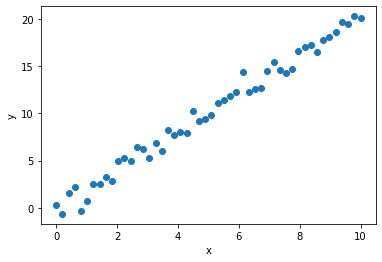

In [16]:
x = np.linspace(0, 10, num=50)
theta = 2
y = f(x)

plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');

In [18]:
X = x.reshape(-1, 1) # size N x 1
Y = y.reshape(-1, 1) # size N x 1

# maximum likelihood estimator
theta_hat = np.linalg.solve(X.T @ X, X.T @ Y)

theta_hat

array([[2.02519507]])

We can show how our $\hat{\boldsymbol  \theta}$ fits the line.

theta = 2.000000
theta_hat = 2.025195


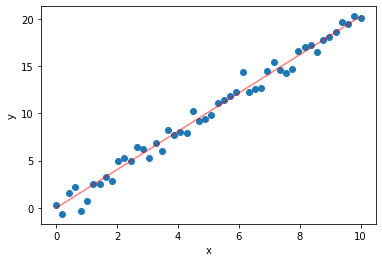

In [19]:
fig, ax = plt.subplots()
ax.scatter(x, y);

xx = [0, 10]
yy = [0, 10 * theta_hat[0, 0]]
ax.plot(xx, yy, 'red', alpha=.5);
ax.set(xlabel='x', ylabel='y');

print("theta = %f" % theta)
print("theta_hat = %f" % theta_hat)

What would happend to $\lVert \hat{\boldsymbol  \theta} - \boldsymbol \theta \rVert$ if we increase the number of datapoints?


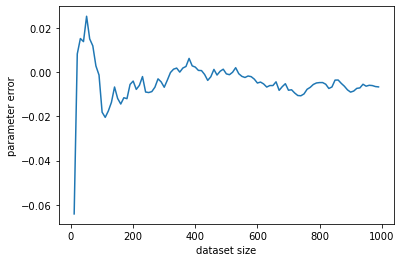

In [28]:
N = np.arange(10, 1000, step=10)
theta_error = []

for num_datapoints in N:
    x = np.linspace(0, 10, num=num_datapoints)
    y = f(x).reshape(-1, 1)
    x = x.reshape(-1, 1)
    theta_hat = np.linalg.solve(x.T @ x, x.T @ y).ravel()
    theta_error.append(theta_hat - theta)

theta_error = np.array(theta_error)

plt.plot(N, theta_error)
plt.xlabel("dataset size")
plt.ylabel("parameter error")
plt.show()